# QS World University Rankings 2024

## 그래프 한국어로 나타내기
- https://www.kaggle.com/datasets/joebeachcapital/qs-world-university-rankings-2024?select=2024+QS+World+University+Rankings+1.1+%28For+qs.com%29.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
# import matplotlib.font_manager as fm 

# font_list = fm.findSystemFonts(fontpaths= None, fontext = 'ttf')
# font_list[:]

In [3]:
from matplotlib import font_manager, rc 

font_path = 'C://Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

In [4]:
## Country Code ## 
import country_converter as coco

## Visualization ## 
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio


In [5]:
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\asia_country.ipynb
.\Kor_UnivRanking_vis.ipynb
.\qs.ipynb
.\qs_city.ipynb
.\qs_kr.ipynb
.\qs_scoring_tables.ipynb
.\qs_univ.ipynb
.\test.txt
.\test2.txt
.\WorldUnivRanking_pred.ipynb
.\datasets\2011_rankings.csv
.\datasets\2012_rankings.csv
.\datasets\2013_rankings.csv
.\datasets\2014_rankings.csv
.\datasets\2015_rankings.csv
.\datasets\2016_rankings.csv
.\datasets\2017_rankings.csv
.\datasets\2018_rankings.csv
.\datasets\2019_rankings.csv
.\datasets\2020_rankings.csv
.\datasets\2021_rankings.csv
.\datasets\2022_qs_rankings.csv
.\datasets\2022_rankings.csv
.\datasets\2023_qs_rankings.csv
.\datasets\2023_rankings.csv
.\datasets\2024_qs_rankings.csv
.\datasets\asia_country.xlsx
.\datasets\asia_df24.xlsx
.\datasets\corr_des_24.xlsx
.\datasets\corr_des_24_raw.xlsx
.\datasets\kor_df24.xlsx
.\datasets\kor_df24_raw.xlsx
.\datasets\kor_score_df24.xlsx
.\datasets\kor_univ_geo.xlsx
.\datasets\kor_univ_geo_info.xlsx
.\datasets\kor_univ_names.xlsx
.\datasets\kor_univ_names_qs.xlsx
.\datasets\qs_

In [6]:
df24_raw = pd.read_csv("./datasets/2024_qs_rankings.csv")
df24 = pd.read_csv("./datasets/2024_qs_rankings.csv")
df24.head()

,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3


In [7]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   2024 RANK                             1498 non-null   object
 1   2023 RANK                             1416 non-null   object
 2   Institution Name                      1498 non-null   object
 3   Country Code                          1498 non-null   object
 4   Country                               1498 non-null   object
 5   SIZE                                  1475 non-null   object
 6   FOCUS                                 1497 non-null   object
 7   RES.                                  1411 non-null   object
 8   AGE                                   1472 non-null   object
 9   STATUS                                1456 non-null   object
 10  Academic Reputation Score             1498 non-null   object
 11  Academic Reputation Rank      

In [8]:
# 점수별 상관관계 
corr_cols = [col for col in df24.columns if 'score' in col.lower()]
corr_cols

['Academic Reputation Score',
 'Employer Reputation Score',
 'Faculty Student Score',
 'Citations per Faculty Score',
 'International Faculty Score',
 'International Students Score',
 'International Research Network Score',
 'Employment Outcomes Score',
 'Sustainability Score',
 'Overall SCORE']

In [9]:
corr_df=df24[corr_cols]
print(corr_df.shape)

(1498, 10)


In [10]:
rename_score = {'Academic Reputation Score' : '학계 평판', 
'Employer Reputation Score' : '고용주 평판', 
'Faculty Student Score' : '교원 대비 학생 비율', 
'Citations per Faculty Score' : '교원당 논문 피인용수', 
'International Faculty Score' : '외국인 교원 비율', 
'International Students Score' : '외국인 학생 비율', 
'International Research Network Score' : '국제 연구 네트워크', 
'Employment Outcomes Score' : '취업 성과', 
'Sustainability Score' : '지속가능성',
'Overall SCORE' : '총점' }

corr_df = corr_df.rename(columns = rename_score)
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   학계 평판        1498 non-null   object
 1   고용주 평판       1497 non-null   object
 2   교원 대비 학생 비율  1474 non-null   object
 3   교원당 논문 피인용수  1474 non-null   object
 4   외국인 교원 비율    1372 non-null   object
 5   외국인 학생 비율    1418 non-null   object
 6   국제 연구 네트워크   1494 non-null   object
 7   취업 성과        1474 non-null   object
 8   지속가능성        1398 non-null   object
 9   총점           1498 non-null   object
dtypes: object(10)
memory usage: 117.2+ KB


In [11]:
corr_df = corr_df.loc[~corr_df['총점'].str.contains('-')] # overall score가 있는 경우만 (없으면 '-'로 표기됨)
print(corr_df.shape)
corr_df = corr_df.dropna()
corr_df = corr_df.drop(corr_df.index[0])
corr_df = corr_df.reset_index(drop=True)
corr_df = corr_df.astype(float)
corr_df

(603, 10)


,학계 평판,고용주 평판,교원 대비 학생 비율,교원당 논문 피인용수,외국인 교원 비율,외국인 학생 비율,국제 연구 네트워크,취업 성과,지속가능성,총점
0,100.0,100.0,100.0,100.0,100.0,88.2,94.3,100.0,95.2,100.0
1,100.0,100.0,100.0,92.3,100.0,95.8,99.9,100.0,97.3,99.2
2,100.0,100.0,100.0,90.6,98.2,98.2,100.0,100.0,97.8,98.9
3,100.0,100.0,98.3,100.0,84.6,66.8,100.0,100.0,96.7,98.3
4,100.0,100.0,100.0,99.9,99.9,51.2,95.8,100.0,94.4,98.1
...,...,...,...,...,...,...,...,...,...,...
581,8.4,2.3,55.2,42.6,13.2,1.4,14.3,17.6,15.8,19.9
582,3.1,1.7,98.8,39.0,8.3,3.1,3.6,7.6,1.0,19.9
583,23.8,26.4,25.1,2.1,11.6,1.7,2.0,72.5,29.4,19.8
584,9.6,5.0,81.5,10.4,16.9,14.5,45.5,22.7,21.4,19.8


In [12]:
corr_df = corr_df.astype(float)

In [13]:
# 평균 점수 

corr_des = corr_df.describe().T
print(corr_des)
corr_des.to_excel('./datasets/corr_des_24_raw.xlsx')

             count       mean        std   min     25%    50%     75%    max
학계 평판        586.0  38.145734  26.596662   3.1  18.100  29.20  53.050  100.0
고용주 평판       586.0  37.004437  28.658335   1.7  13.425  29.05  52.450  100.0
교원 대비 학생 비율  586.0  39.658362  31.336091   1.7  12.025  30.45  64.500  100.0
교원당 논문 피인용수  586.0  44.861945  30.565980   1.1  18.625  41.55  68.400  100.0
외국인 교원 비율    586.0  51.150683  36.351442   1.3  15.100  46.55  91.300  100.0
외국인 학생 비율    586.0  42.012287  34.185188   1.1  11.025  31.60  74.775  100.0
국제 연구 네트워크   586.0  47.680887  32.778916   1.0  17.175  47.90  78.725  100.0
취업 성과        586.0  32.059044  25.540800   4.0  13.200  22.25  42.475  100.0
지속가능성        586.0  50.266382  32.242397   1.0  21.400  50.60  80.400  100.0
총점           586.0  41.290273  19.248188  19.8  25.825  35.65  51.875  100.0


In [14]:
# # 숫자형 변수 분포 살펴보기 - 그래프 
# nd = pd.melt(corr_df, value_vars = corr_df)

# n1 = sns.FacetGrid (nd, col='variable', col_wrap=2, sharex=False, sharey = False)
# n1 = n1.map(sns.distplot, 'value')
# n1;

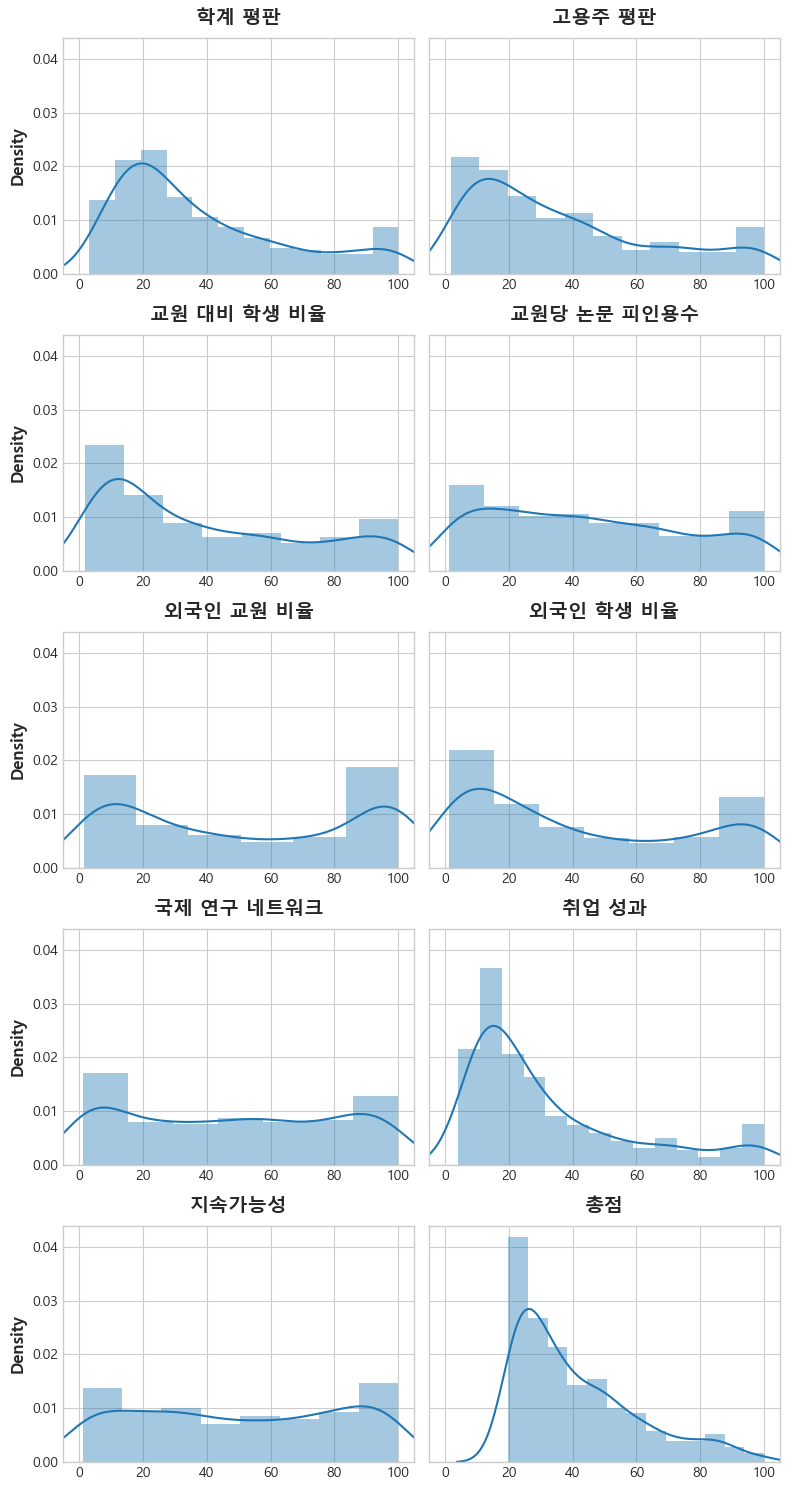

In [15]:
# 점수별 Density graph  
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharey=True)  # y축을 공유하도록 설정
x_min, x_max = -5, 105  # x축 범위 설정

for idx, score in enumerate(corr_df.columns):
    sns.distplot(corr_df, x=corr_df[score], ax=axes[idx//2, idx%2], kde=True) 
    axes[idx // 2, idx % 2].set_title(score)
    axes[idx // 2, idx % 2].set_xlim(x_min, x_max)  # x축 범위 적용

plt.tight_layout() 
plt.show()

fig = fig.get_figure()
fig.savefig(f'outputs/QS/KR_score_density_graphs2.png', format='png')


In [16]:
x_min, x_max = -5, 105  # x축 범위 설정
y_min, y_max = 0, 0.045  # y축 범위 설정

for idx, score in enumerate(corr_df.columns):
    plt.figure(figsize=(6, 4))  # 각 그래프의 사이즈 설정
    sns.distplot(corr_df[score], kde=True)  # 그래프 생성
    plt.xlim(x_min, x_max)  # x축 범위 적용
    plt.ylim(y_min, y_max)  # y축 범위 적용

    # 그래프 저장
    plt.savefig(f'outputs/QS/KR_score_{idx}_{score}_density.png', format='png')
    plt.close()  # 현재 생성된 그래프를 닫음


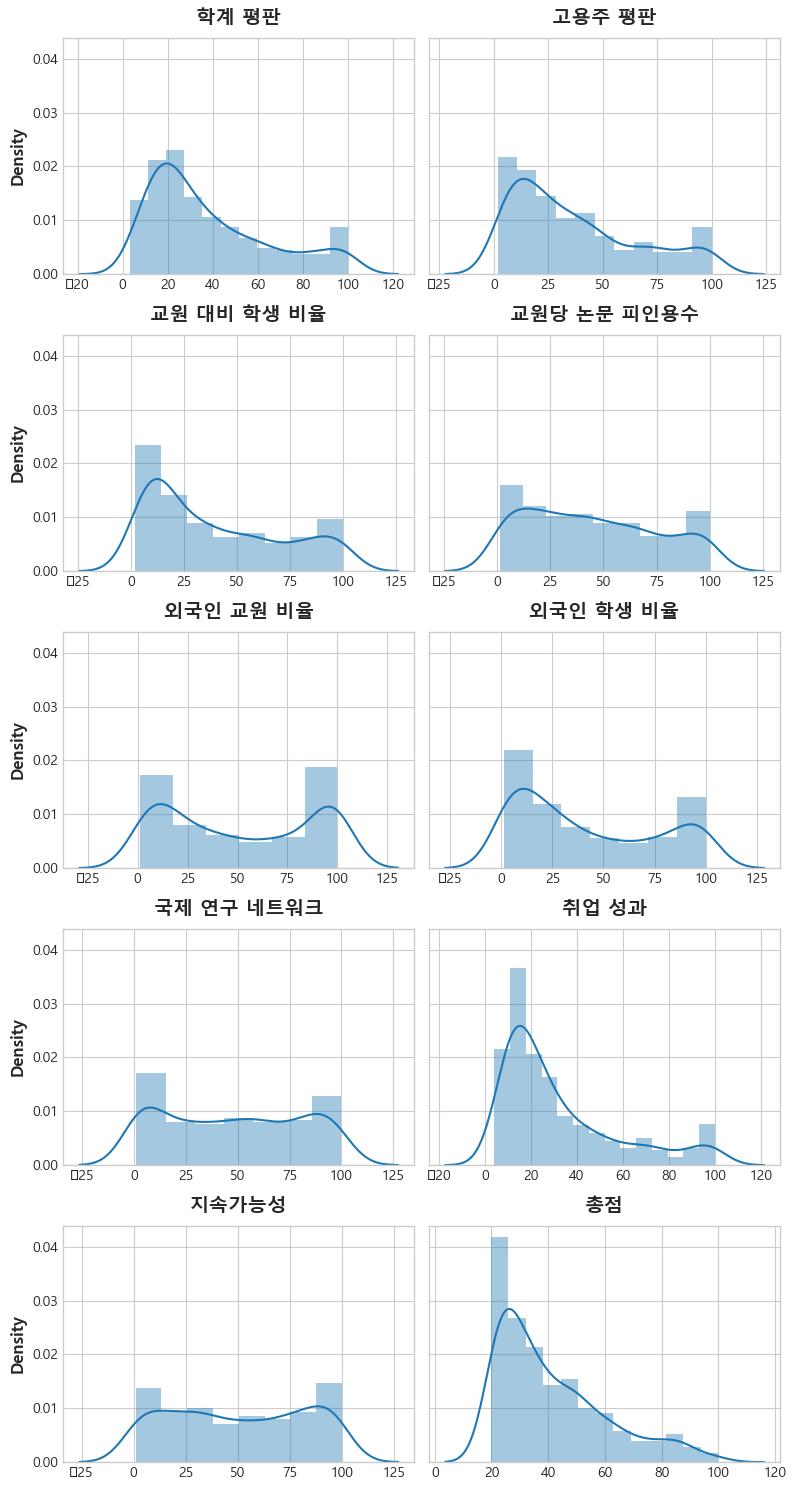

In [17]:
# 점수별 Density graph  
fig, axes = plt.subplots(5, 2, figsize=(8, 15), sharey=True)  # y축을 공유하도록 설정
for idx, score in enumerate(corr_df.columns):
    sns.distplot(corr_df, x = corr_df[score], ax = axes[idx//2, idx%2], kde=True)
    axes[idx // 2, idx % 2].set_title(score)

plt.tight_layout() 
plt.show()

fig = fig.get_figure()
fig.savefig(f'outputs/QS/KR_score_density_graphs.png', format='png')

In [ ]:
# 결측치 확인 
for colname in corr_cols:
    all_digits = corr_df[colname].apply(lambda x: x.replace(".", "", 1).isdigit())
    num_false = len(all_digits) - all_digits.sum()
    print(f'{colname} 컬럼의 잘못 입력된 값 수: {num_false}')

In [19]:
# 상관관계표 작성
pearson_corr = corr_df.corr()['총점']
pearson_corr = pearson_corr.drop('총점')
pearson_corr = pearson_corr.sort_values()

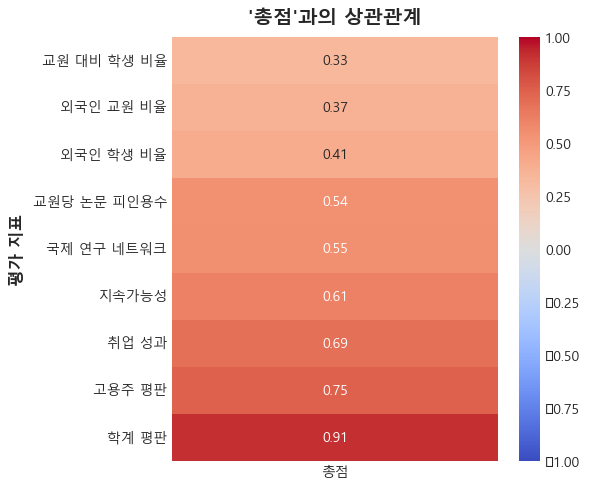

In [20]:
plt.figure(figsize=(6, 5))
sns_1 = sns.heatmap(pearson_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title("'총점'과의 상관관계")
plt.ylabel('평가 지표')

plt.show()

fig = sns_1.get_figure()
fig.savefig(f'outputs/QS/KR_correlations_heatmap.png', format='png')

In [21]:
fig = px.bar(pearson_corr, 
             x=pearson_corr.index, 
             y=pearson_corr.values,
             title="<b>'총점'과의 상관관계</b>",
             color=pearson_corr.values,
             text=np.round(pearson_corr.values,2),
             color_continuous_scale='YlGn')

fig.update_layout(xaxis_title='평가 지표',
                  yaxis_title='상관관계',
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  height=600, width=1000, 
                 )

fig.update_layout(template='simple_white')
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)

fig.show()
pio.write_image(fig, f'outputs/QS/KR_correlations_bar.png', format='png')


- https://www.kaggle.com/code/shinhaijin/which-factors-affect-2024-university-qs-ranking

In [22]:
# 범주형 변수 클리닝 함수 

categorical_cols = ['Institution Name', 'Country', 'SIZE', 'FOCUS', 'RES.']
def convert_to_int(df):
    for col in df.columns:
        if (col not in (categorical_cols)):
            df[col] = df[col].str.extract('(\d+)').astype(int)
    return df

In [ ]:
# categorical_cols = ['Institution Name', 'Country', 'SIZE', 'FOCUS', 'RES.']
# df24[categorical_cols].head(3)

In [ ]:
# 한국만 별도 (raw file)
# df24 = pd.read_csv("./datasets/2024_qs_rankings.csv")
# df24 = df24.drop(df24.index[0])
# KOR_PATH_RAW = 'C:/data_science/UnivRanking/datasets/kor_df24_raw.xlsx'
# df24[df24['Country'] == 'South Korea'].to_excel(KOR_PATH_RAW)

In [23]:
def clean_data(df):
    
    # drop first row of data
    df.drop(0, axis=0, inplace=True)
    
    # drop any NaN vaules and NaN Overall SCORE
    df = df.dropna()
    df = df.loc[df['Overall SCORE'] != '-']
    
    # concat rank, categorical, and score columns 
    rank_df = df[['2024 RANK', '2023 RANK']]
    cat_df = df[['Institution Name', 'Country', 'SIZE', 'FOCUS', 'RES.', 'AGE']]
    score_cols = [col for col in df.columns if 'score' in col.lower()]
    score_df = df[score_cols]
    df = pd.concat([rank_df, cat_df, score_df], axis=1)
    
    # convert object types to int types 
    df = convert_to_int(df)
    
    # create rank change column
    df['Rank Change'] = df['2023 RANK'] - df['2024 RANK']
 
    df['2023 RANK_ori'] = df['2023 RANK']
    df['2024 RANK_ori'] = df['2024 RANK'] 
      
    # times -1 value to RANK 2023 and RANK 2024 as lower ranking = better
    df['2023 RANK'] = -1 * df['2023 RANK']
    df['2024 RANK'] = -1 * df['2024 RANK']
    
    return df

df24 = clean_data(df24_raw)
print(df24.shape)
df24.head()

(567, 21)


,2024 RANK,2023 RANK,Institution Name,Country,SIZE,FOCUS,RES.,AGE,Academic Reputation Score,Employer Reputation Score,...,Citations per Faculty Score,International Faculty Score,International Students Score,International Research Network Score,Employment Outcomes Score,Sustainability Score,Overall SCORE,Rank Change,2023 RANK_ori,2024 RANK_ori
1,-1,-1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,100,100,...,100,100,88,94,100,95,100,0,1,1
2,-2,-2,University of Cambridge,United Kingdom,L,FC,VH,5,100,100,...,92,100,95,99,100,97,99,0,2,2
3,-3,-4,University of Oxford,United Kingdom,L,FC,VH,5,100,100,...,90,98,98,100,100,97,98,1,4,3
4,-4,-5,Harvard University,United States,L,FC,VH,5,100,100,...,100,84,66,100,100,96,98,1,5,4
5,-5,-3,Stanford University,United States,L,FC,VH,5,100,100,...,99,99,51,95,100,94,98,-2,3,5


In [24]:
# 변수명 수정 
rename_cat = {
'2024 RANK' : '2024 순위', 
'2023 RANK' : '2023 순위',  
'Rank Change' : '순위 변동', 
'Institution Name' : '학교명', 
'Country' : '국가', 
'SIZE' : '규모', 
'FOCUS': '학과 범위', 
'RES.' : '연구 집중도', 
'AGE' : '역사'}


df24 = df24.rename(columns = rename_score)
df24 = df24.rename(columns = rename_cat)
df24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 1 to 602
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   2024 순위        567 non-null    int32 
 1   2023 순위        567 non-null    int32 
 2   학교명            567 non-null    object
 3   국가             567 non-null    object
 4   규모             567 non-null    object
 5   학과 범위          567 non-null    object
 6   연구 집중도         567 non-null    object
 7   역사             567 non-null    int32 
 8   학계 평판          567 non-null    int32 
 9   고용주 평판         567 non-null    int32 
 10  교원 대비 학생 비율    567 non-null    int32 
 11  교원당 논문 피인용수    567 non-null    int32 
 12  외국인 교원 비율      567 non-null    int32 
 13  외국인 학생 비율      567 non-null    int32 
 14  국제 연구 네트워크     567 non-null    int32 
 15  취업 성과          567 non-null    int32 
 16  지속가능성          567 non-null    int32 
 17  총점             567 non-null    int32 
 18  순위 변동          567 non-null    int3

In [25]:
# 전세계 567개 대학 정보 
print(df24.shape)
df24.info()

(567, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 1 to 602
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   2024 순위        567 non-null    int32 
 1   2023 순위        567 non-null    int32 
 2   학교명            567 non-null    object
 3   국가             567 non-null    object
 4   규모             567 non-null    object
 5   학과 범위          567 non-null    object
 6   연구 집중도         567 non-null    object
 7   역사             567 non-null    int32 
 8   학계 평판          567 non-null    int32 
 9   고용주 평판         567 non-null    int32 
 10  교원 대비 학생 비율    567 non-null    int32 
 11  교원당 논문 피인용수    567 non-null    int32 
 12  외국인 교원 비율      567 non-null    int32 
 13  외국인 학생 비율      567 non-null    int32 
 14  국제 연구 네트워크     567 non-null    int32 
 15  취업 성과          567 non-null    int32 
 16  지속가능성          567 non-null    int32 
 17  총점             567 non-null    int32 
 18  순위 변동          567 non-nu

In [ ]:
# df24['2024 RANK'].value_counts().sort_index()

In [26]:
country_codes = coco.convert(df24['국가'], to='ISO3')
country_codes = pd.Series(country_codes)
university_location = country_codes.value_counts()

fig = px.choropleth(locations=university_location.index,
                    title='<b>전세계 상위 600위권 대학 분포 지도</b>',
                    color=university_location.values,
                    color_continuous_scale=px.colors.sequential.YlGn)
fig.update_layout(height=500, width=800)
fig.update_layout(template='simple_white')
fig.show()

pio.write_image(fig, f'outputs/QS/KR_top600_univ_location.png', format='png')

In [27]:
row_n = 2
col_n = 2 

fig = make_subplots(rows=row_n, cols=col_n)

size_counts = df24['규모'].value_counts().sort_values(ascending=True)
focus_counts = df24['학과 범위'].value_counts().sort_values(ascending=True)
rs_counts = df24['연구 집중도'].value_counts().sort_values(ascending=True)
age_counts = df24['역사'].value_counts().sort_values(ascending=True)
categorical_lst = [size_counts, focus_counts, rs_counts, age_counts]
categorical_labels = ['규모', '학과 범위', '연구 집중도', '역사']


max_y = max([categorical_lst[i].max() for i in range(len(categorical_labels))])


for i, col in enumerate(categorical_labels):
    fig.add_trace(
        go.Bar(
            x=categorical_lst[i].index.astype('str'),
            y=categorical_lst[i].values, 
            name=col,
            text=np.round(categorical_lst[i].values,3),
            textposition='auto',
            marker_color=px.colors.sequential.YlGn,
            textfont=dict(size=12),
            yaxis='y'),
        row=int(i/col_n)+1, col=int(i%col_n)+1
        )
    
fig.update_yaxes(range=[0, max_y])
fig.update_layout(
    title_text='<b>특성별 대학 분포</b>',
    height=600, width=1000, 
)

fig.update_layout(template='simple_white')
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)


fig.show()

Categorical Variables Explanation:

- SIZE:
XL - more than 30,000 students  
L - >= 12,000 students  
M - >= 5,000 students  
S- fewer than 5,000 students  
  
- FOCUS:
FC - fully comprehensive (all 5 faculty areas + medical school)  
CO - comprehensive (all 5 faculty areas)  
FO - focused (3 or 4 faculty areas)  
SP - Specialist (2 or fewer faculty areas)  
  
- AGE:
1 - new (less than 10 years old and more)  
2 - young (10-24 years old)  
3 - established (25-49 years old)  
4 - mature (50-99 years old)  
5 - historic (100 years old and more)  
  
- RES. (Research Intensity):
VH - very High  
HI - high  
MD - medium  
LO - low  

## Top 20 

In [28]:
# 상위 20개 대학만 선택
top20_df24 = df24[:20]

In [29]:
# 한국 -> South Korea 
df24['국가'].value_counts()

국가
United States                94
United Kingdom               58
China (Mainland)             36
Germany                      32
Australia                    30
Canada                       19
Spain                        17
France                       16
Italy                        16
South Korea                  16
Russia                       14
Japan                        13
Netherlands                  13
India                        10
Malaysia                      9
Taiwan                        9
Switzerland                   9
Sweden                        8
New Zealand                   8
Belgium                       8
Finland                       7
Turkey                        6
Austria                       6
Hong Kong SAR                 6
Ireland                       6
Denmark                       5
Portugal                      5
Argentina                     5
Brazil                        5
United Arab Emirates          5
South Africa                  5
Israe

In [ ]:
# # 워드 클라우드 
# data = dict(zip(df24['Institution Name'].tolist(), df24['2024 RANK'].tolist()))

# plt.figure(figsize=(20,15))

# wc = WordCloud(width=800,
#                height=500,
#                max_words=20,
#                colormap='autumn',
#                background_color='white').generate_from_frequencies(data)

# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [30]:
# top 20개 대학과 고려대학교 
korea_df24 = df24.loc[df24['학교명'] == 'Korea University']
top20_df24_with_korea = pd.concat([top20_df24, korea_df24])
top20_df24_with_korea.tail(3)

,2024 순위,2023 순위,학교명,국가,규모,학과 범위,연구 집중도,역사,학계 평판,고용주 평판,...,교원당 논문 피인용수,외국인 교원 비율,외국인 학생 비율,국제 연구 네트워크,취업 성과,지속가능성,총점,순위 변동,2023 RANK_ori,2024 RANK_ori
19,-19,-45,The University of New South Wales (UNSW Sydney),Australia,XL,FC,VH,4,89,88,...,95,100,99,99,95,99,86,26,45,19
20,-19,-41,The University of Sydney,Australia,XL,FC,VH,5,96,87,...,93,99,100,91,88,99,86,22,41,19
79,-79,-74,Korea University,South Korea,L,FC,VH,4,82,94,...,36,13,36,19,70,58,64,-5,74,79


In [31]:
top20_rank_change = top20_df24_with_korea.groupby('학교명')['순위 변동'].mean().sort_values(ascending=True)
# Top 20 Universities with Korea University 
fig = px.bar(x=top20_rank_change.index, y=top20_rank_change.values,
            text=np.round(top20_rank_change.values),
            title='<b>2023년과 2024년 사이의 대학 순위 변동</b><br><sup>고려대와 상위 20위권 대학 비교</sup>',
            color=top20_rank_change.values,
            color_continuous_scale='YlGn')

fig.update_layout(xaxis_title='학교명',
                  yaxis_title='순위 변동',
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  height=600, width=1000, 
                 )

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(template='simple_white')
fig.show()
pio.write_image(fig, f'outputs/QS/KR_rank_changes_top20_with_korea.png', format='png')

In [33]:
corr_cols = ['학계 평판', '고용주 평판', '교원 대비 학생 비율', '교원당 논문 피인용수', '외국인 교원 비율', 
             '외국인 학생 비율', '국제 연구 네트워크', '취업 성과', '지속가능성', '총점']

for score in corr_cols: 
    target_cols = ['학교명', score]
    data = top20_df24_with_korea[target_cols].sort_values(by=score, ascending=False)

    fig = px.bar(data, 
                x=data['학교명'], 
                y=data[score],
                title=f"<b>고려대와 상위 20위권 대학의 '{score}' 점수 비교</b>", 
                color=[x if x == 'Korea University' else 'Others' for x in data['학교명']],
                color_discrete_map={'Korea University': '#900023', 'Others' : '#E7BC7B'}
                )

    fig.update_xaxes(categoryorder='array', categoryarray=data['학교명'])
    fig.update_layout(showlegend=False)
    fig.update_layout(xaxis_title='학교명',
                        yaxis_title=f'{score}',
                        xaxis_title_font_color='black',
                        xaxis_title_font_size=17,
                        yaxis_title_font_color='black',
                        yaxis_title_font_size=17,
                        height=600, width=1000)
    fig.update_layout(template='simple_white')

    fig.show()
    pio.write_image(fig, f'outputs/QS/KR_3_{score}_comparison_top20_with_korea.png', format='png')

## 아시아 대학

In [34]:
asia_country = pd.read_excel("./datasets/asia_country.xlsx")
region_df24 = df24.merge(asia_country, left_on = '국가', right_on = 'Country', how='left')
asia_df24 = region_df24[region_df24['Region'] == 'Asia']
print(asia_df24.shape)
asia_df24.head(2)

(149, 24)


,2024 순위,2023 순위,학교명,국가,규모,학과 범위,연구 집중도,역사,학계 평판,고용주 평판,...,국제 연구 네트워크,취업 성과,지속가능성,총점,순위 변동,2023 RANK_ori,2024 RANK_ori,Country,Region,Sub_Region
7,-8,-11,National University of Singapore (NUS),Singapore,XL,FC,VH,3,99,88,...,76,100,88,92,3,11,8,Singapore,Asia,South-Eastern Asia
16,-17,-12,Peking University,China (Mainland),XL,FC,VH,5,99,95,...,43,82,68,87,-5,12,17,China (Mainland),Asia,Eastern Asia


In [ ]:
# asia_df24.to_excel("./datasets/asia_df24.xlsx")

In [35]:
cols = ['학교명', '2024 RANK_ori', '총점', '2023 RANK_ori']
top20_aisa_df24 = asia_df24[cols].head(20)
top20_aisa_df24.to_excel("./datasets/top20_asia_df24.xlsx")

## Universities in S.Korea 

In [36]:
print(df24.shape)

(567, 21)


In [37]:
# 한국 대학 
kor_df24 = df24[df24['국가'] == 'South Korea']
print(kor_df24.shape)
kor_df24.head(3)

(16, 21)


,2024 순위,2023 순위,학교명,국가,규모,학과 범위,연구 집중도,역사,학계 평판,고용주 평판,...,교원당 논문 피인용수,외국인 교원 비율,외국인 학생 비율,국제 연구 네트워크,취업 성과,지속가능성,총점,순위 변동,2023 RANK_ori,2024 RANK_ori
41,-41,-29,Seoul National University,South Korea,L,FC,VH,4,99,98,...,64,11,14,36,100,73,78,-12,29,41
56,-56,-42,KAIST - Korea Advanced Institute of Science & ...,South Korea,M,CO,VH,4,89,88,...,97,22,11,10,41,14,72,-14,42,56
77,-76,-73,Yonsei University,South Korea,L,FC,VH,4,80,96,...,36,19,49,25,70,38,65,-3,73,76


In [38]:
# 대학 한글명, 축약어, 주소 정보 불러오기 
UNIV_PATH = 'C:/data_science/UnivRanking/datasets/kor_univ_geo.xlsx'
kor_univ_geo = pd.read_excel(UNIV_PATH, index_col=0)
kor_univ_geo.tail(3)

,name_kr,name,name_abb,qs_name,addr_name,addr,x,y
36,국민대학교,Kookmin University,Kookmin,NaN,국민대학교,"서울특별시 성북구 정릉로 77 (정릉동, 국민대학교)",126.994728,37.610924
37,한국항공대학교,Korea Aerospace University,KAU,NaN,한국항공대학교,"경기도 고양시 덕양구 항공대학로 76 (화전동, 한국항공대학교)",126.864879,37.597552
38,한국외국어대학교,Hankuk University of Foreign Studies,HUFS,HUFS - Hankuk (Korea) University of Foreign St...,한국외국어대학교,"서울특별시 동대문구 이문로 107 (이문동, 한국외국어대학교)",127.058313,37.597276


In [39]:
# 한국 대학 점수 분포
kor_df24.describe().T

,count,mean,std,min,25%,50%,75%,max
2024 순위,16.0,-288.6875,195.296943,-575.0,-495.00,-297.0,-94.75,-41.0
2023 순위,16.0,-247.3125,177.739404,-551.0,-396.50,-233.5,-73.75,-29.0
역사,16.0,3.6875,0.704154,2.0,3.00,4.0,4.00,5.0
학계 평판,16.0,42.3125,31.127092,11.0,16.50,27.0,68.00,99.0
고용주 평판,16.0,51.8125,33.574234,8.0,21.75,45.0,82.75,98.0
교원 대비 학생 비율,16.0,72.0000,21.301017,14.0,65.50,81.0,84.25,99.0
교원당 논문 피인용수,16.0,44.1250,37.327157,1.0,12.50,36.0,73.00,100.0
외국인 교원 비율,16.0,18.6875,9.823229,7.0,12.50,16.5,22.50,41.0
외국인 학생 비율,16.0,27.7500,16.771007,2.0,13.25,25.0,38.25,54.0
국제 연구 네트워크,16.0,10.8125,11.461348,1.0,1.00,8.0,16.75,36.0


In [ ]:
# KOR_PATH = 'C:/data_science/UnivRanking/datasets/kor_df24.xlsx'
# kor_df24.to_excel(KOR_PATH)

KOR_PATH = 'C:/data_science/UnivRanking/datasets/kor_df24.xlsx'
kor_df24.to_excel(KOR_PATH)

In [40]:
merged_kor_df24 = kor_df24.merge(kor_univ_geo, left_on = '학교명', right_on='qs_name', how='left')
print(merged_kor_df24.shape)
print(merged_kor_df24.isnull().sum())

(16, 29)
2024 순위          0
2023 순위          0
학교명              0
국가               0
규모               0
학과 범위            0
연구 집중도           0
역사               0
학계 평판            0
고용주 평판           0
교원 대비 학생 비율      0
교원당 논문 피인용수      0
외국인 교원 비율        0
외국인 학생 비율        0
국제 연구 네트워크       0
취업 성과            0
지속가능성            0
총점               0
순위 변동            0
2023 RANK_ori    0
2024 RANK_ori    0
name_kr          0
name             0
name_abb         0
qs_name          0
addr_name        0
addr             0
x                0
y                0
dtype: int64


In [41]:
merged_kor_df24

,2024 순위,2023 순위,학교명,국가,규모,학과 범위,연구 집중도,역사,학계 평판,고용주 평판,...,2023 RANK_ori,2024 RANK_ori,name_kr,name,name_abb,qs_name,addr_name,addr,x,y
0,-41,-29,Seoul National University,South Korea,L,FC,VH,4,99,98,...,29,41,서울대학교,Seoul National University,SNU,Seoul National University,서울대학교,"서울특별시 관악구 관악로 1 (신림동, 서울대학교)",126.957025,37.468557
1,-56,-42,KAIST - Korea Advanced Institute of Science & ...,South Korea,M,CO,VH,4,89,88,...,42,56,한국과학기술원 본원,Korea Advanced Institute of Science and Techno...,KAIST,KAIST - Korea Advanced Institute of Science & ...,한국과학기술원,"대전광역시 유성구 대학로 291 (구성동, 한국과학기술원)",127.362315,36.374360
2,-76,-73,Yonsei University,South Korea,L,FC,VH,4,80,96,...,73,76,연세대학교,Yonsei University (Seoul campus),Yonsei,Yonsei University,연세대학교,"서울특별시 서대문구 연세로 50 (신촌동, 연세대학교)",126.938914,37.564344
3,-79,-74,Korea University,South Korea,L,FC,VH,4,82,94,...,74,79,고려대학교,Korea University,Korea,Korea University,고려대학교,"서울특별시 성북구 안암로 145 (안암동5가, 고려대학교안암캠퍼스(인문사회계))",127.028875,37.591427
4,-100,-71,Pohang University of Science And Technology (P...,South Korea,S,FO,VH,3,51,75,...,71,100,포항공과대학교,Pohang University of Science and Technology (P...,POSTECH,Pohang University of Science And Technology (P...,포항공과대학교,"경상북도 포항시 남구 청암로 77 (지곡동, 포항공과대학교)",129.320812,36.016467
5,-145,-99,Sungkyunkwan University(SKKU),South Korea,L,FC,VH,5,64,71,...,99,145,성균관대학교,Sungkyunkwan University (SKKU),SKKU,Sungkyunkwan University(SKKU),성균관대학교,"서울특별시 종로구 성균관로 25-2 (명륜3가, 성균관대학교)",126.990956,37.587298
6,-164,-157,Hanyang University,South Korea,L,FC,VH,4,49,81,...,157,164,한양대학교,Hanyang University,Hanyang,Hanyang University,한양대학교,"서울특별시 성동구 왕십리로 222 (사근동, 한양대학교)",127.043770,37.556577
7,-266,-197,Ulsan National Institute of Science and Techno...,South Korea,S,FO,VH,2,15,11,...,197,266,울산과학기술원,Ulsan National Institute of Science and Techno...,UNIST,Ulsan National Institute of Science and Techno...,울산과학기술원,"울산광역시 울주군 언양읍 유니스트길 50 (반연리, 울산과학기술대학교)",129.189652,35.575423
8,-328,-288,Gwangju Institute of Science and Technology (G...,South Korea,S,FO,VH,3,17,8,...,288,328,광주과학기술원,Gwangju Institute of Science and Technology (G...,GIST,Gwangju Institute of Science and Technology (G...,광주과학기술원,"광주광역시 북구 첨단과기로 123 (오룡동, 광주과학기술원)",126.840161,35.228162
9,-332,-270,Kyung Hee University,South Korea,L,FC,VH,4,28,41,...,270,332,경희대학교,Kyung Hee University,Kyunghee,Kyung Hee University,경희대학교,"서울특별시 동대문구 경희대로 26 (회기동, 경희대학교)",127.050939,37.594441


In [42]:
# cluster map 그리기 
import folium 
from folium.plugins import MarkerCluster

m = folium.Map(location=[37.591427446, 127.028874720], zoom_start=8) # 고려대학교 

loc = merged_kor_df24[['y', 'x']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(merged_kor_df24['y'], merged_kor_df24['x']):
    folium.Circle([lat, long], radius = 2000, color = '#3e3a39').add_to(marker_cluster)

m.save('outputs/QS/KR_kor_univ_cluster_map_basic.html')

m

In [43]:
# cluster map 그리기 
import folium 
from folium.plugins import MarkerCluster

m = folium.Map(location=[37.591427446, 127.028874720], tiles = 'CartoDB positron' , zoom_start=8) # 고려대학교 

loc = merged_kor_df24[['y', 'x']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(merged_kor_df24['y'], merged_kor_df24['x']):
    folium.Circle([lat, long], radius = 2000, color = '#005506').add_to(marker_cluster)

m.save('outputs/QS/KR_kor_univ_cluster_map.html')

m

In [44]:
kor_rank_change = merged_kor_df24.groupby('name_abb')['순위 변동'].mean().sort_values(ascending=True)

fig = px.bar(x=kor_rank_change.index, y=kor_rank_change.values,
            text=np.round(kor_rank_change.values),
            title='<b>한국 대학의 2023년과 2024년 사이의 순위 변동</b>',
            color=kor_rank_change.values,
            color_continuous_scale='YlGn')

fig.update_layout(xaxis_title='학교명',
                  yaxis_title='순위 변동',
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  height=500, width=1000, 
                 )

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(template='simple_white')
fig.show()
pio.write_image(fig, f'outputs/QS/KR_rank_changes_kor.png', format='png')

In [45]:
# 고려대학교 점수 분포 
merged_kor_df24.loc[merged_kor_df24['name_abb'] == 'Korea'][corr_cols].T

,3
학계 평판,82
고용주 평판,94
교원 대비 학생 비율,81
교원당 논문 피인용수,36
외국인 교원 비율,13
외국인 학생 비율,36
국제 연구 네트워크,19
취업 성과,70
지속가능성,58
총점,64


In [46]:
kor_corr_cols = corr_cols
kor_corr_cols.append('name_abb')
merged_kor_df24[kor_corr_cols].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
학계 평판,99,89,80,82,51,64,49,15,17,28,13,19,26,21,11,13
고용주 평판,98,88,96,94,75,71,81,11,8,41,17,36,23,49,18,23
교원 대비 학생 비율,85,66,87,81,99,81,83,84,38,84,14,69,77,55,64,85
교원당 논문 피인용수,64,97,36,36,98,37,23,98,100,14,65,8,7,5,17,1
외국인 교원 비율,11,22,19,13,33,17,16,41,21,14,24,13,7,7,9,32
외국인 학생 비율,14,11,49,36,2,34,54,10,10,54,26,36,19,24,20,45
국제 연구 네트워크,36,10,25,19,1,9,15,1,1,16,29,1,1,1,7,1
취업 성과,100,41,70,70,13,26,24,8,8,12,5,12,15,16,43,5
지속가능성,73,14,38,58,16,27,77,1,2,33,8,2,6,1,54,1
총점,78,72,65,64,60,51,49,37,32,32,26,23,23,22,22,20


In [ ]:
# KOR_SCORE_PATH = 'C:/data_science/UnivRanking/datasets/kor_score_df24.xlsx'
# merged_kor_df24[kor_corr_cols].T.to_excel(KOR_SCORE_PATH)

In [47]:
# '교원 대비 학생 비율'
target_cols = ['name_abb', '교원 대비 학생 비율']
kor_fct_std_score = merged_kor_df24[target_cols].sort_values(by='교원 대비 학생 비율', ascending=False)

fig = px.bar(kor_fct_std_score, 
             x=kor_fct_std_score['name_abb'], 
             y=kor_fct_std_score['교원 대비 학생 비율'],
            title="<b>한국 대학의 '교원 대비 학생 비율' 점수 비교", 
            color=[x if x == 'Korea' else 'Others' for x in kor_fct_std_score['name_abb']],
            color_discrete_map={'Korea': '#900023', 'Others' : '#E7BC7B'}
            )

fig.update_xaxes(categoryorder='array', categoryarray=kor_fct_std_score['name_abb'])
fig.update_layout(showlegend=False)
fig.update_layout(xaxis_title='학교명',
                  yaxis_title='교원 대비 학생 비율',
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  height=500, width=1000, 
                 )
fig.update_layout(template='simple_white')


fig.show()

In [48]:
# 'name_abb' 있으면 삭제하기 
# corr_cols.remove('name_abb')
corr_cols.remove('name_abb')

In [49]:
# 한국 대학 - 점수 bar 그래프 한꺼번에 그리기 

for score in corr_cols: 
    target_cols = ['name_abb', score]
    data = merged_kor_df24[target_cols].sort_values(by=score, ascending=False)

    fig = px.bar(data, 
                x=data['name_abb'], 
                y=data[score],
                title= f"<b>한국 대학의 '{score}' 점수 비교", 
                color=[x if x == 'Korea' else 'Others' for x in data['name_abb']],
                color_discrete_map={'Korea': '#900023', 'Others' : '#E7BC7B'}
                )

    fig.update_xaxes(categoryorder='array', categoryarray=data['name_abb'])
    fig.update_layout(showlegend=False)
    fig.update_layout(xaxis_title='학교명',
                        yaxis_title=f'{score}',
                        xaxis_title_font_color='black',
                        xaxis_title_font_size=17,
                        yaxis_title_font_color='black',
                        yaxis_title_font_size=17,
                        height=500, width=1000)
    fig.update_layout(template='simple_white')

    fig.show()
    pio.write_image(fig, f'outputs/QS/KR_3_{score}_comparison_kor.png', format='png')
    
    

In [50]:
corr_cols.remove('총점')

In [51]:
df24[df24['학교명'] == 'Korea University'][corr_cols].transpose()

,79
학계 평판,82
고용주 평판,94
교원 대비 학생 비율,81
교원당 논문 피인용수,36
외국인 교원 비율,13
외국인 학생 비율,36
국제 연구 네트워크,19
취업 성과,70
지속가능성,58


In [52]:
def school_scores(institution_name) -> pd.DataFrame :
    institution_scores = df24[df24['학교명'] == institution_name][corr_cols].transpose()
    institution_scores.reset_index(inplace=True)
    institution_scores.columns = ['평가 지표', '점수']
    institution_scores['점수'] = institution_scores['점수'].astype(float)
    return institution_scores


korea_univ = school_scores('Korea University')

fig = px.line_polar(korea_univ , r='점수', theta='평가 지표', 
                    title='<b>Korea University</b>', 
                    line_close=True)
fig.update_layout(height=500, width=800)
fig.update_polars(
    radialaxis=dict(dtick=20, range=[0, 100]  # 눈금 간격 설정
))
fig.update_traces(line=dict(color='#900023'))
fig.show()
pio.write_image(fig, f'outputs/QS/KR_5_radar_korea_university.png', format='png')

In [53]:
for university in top20_df24['학교명']:
    data = school_scores(university)
    fig = px.line_polar(data , r='점수', theta='평가 지표', 
                        title=f'<b>{university}</b>', 
                        line_close=True)
    fig.update_layout(height=500, width=800)
    fig.update_polars(radialaxis=dict(dtick=20, range=[0, 100]))
    fig.update_traces(line=dict(color='#3E3A39'))
    fig.show()
    pio.write_image(fig, f'outputs/QS/KR_5_radar_{university}.png', format='png')

In [ ]:
def school_scores(institution_name) -> pd.DataFrame :
    institution_scores = df24[df24['학교명'] == institution_name][corr_cols].transpose()
    institution_scores.reset_index(inplace=True)
    institution_scores.columns = ['평가 지표', '점수']
    institution_scores['점수'] = institution_scores['점수'].astype(float)
    return institution_scores

In [54]:
korea_univ = school_scores('Korea University')
snu = school_scores('Seoul National University')
yonsei_univ = school_scores('Yonsei University')
nu_of_singapore = school_scores('National University of Singapore (NUS)') # 학교명 주의 
univ_of_tokyo = school_scores('The University of Tokyo') # Rank 28
# univ_of_hk = school_scores('The University of Hong Kong') # Rank 26


korea_univ['학교명'] = 'Korea University'
snu['학교명'] = 'Seoul National University'
yonsei_univ['학교명'] = 'Yonsei University'
nu_of_singapore['학교명'] = 'National University of Singapore'
univ_of_tokyo['학교명'] = 'University of Tokyo'
# univ_of_hk['학교명'] = 'University of Hong Kong'

compare_univ = pd.concat([korea_univ, snu, yonsei_univ, nu_of_singapore, univ_of_tokyo], axis=0)

fig = px.line_polar(compare_univ, r='점수', theta='평가 지표',
                    color = '학교명', 
                    title=f'<b>고려대와 아시아 주요 대학과의 평가 지표 점수 비교</b>', 
                    color_discrete_map={
                        'Korea University': '#900023', 
                        'Seoul National University': '#0F0F70', 
                        'Yonsei University': '#5B5756', 
                        'National University of Singapore': '#999696', 
                        'University of Tokyo': '#E7BC7B', 
                        }, 
                    line_close=True)
fig.update_layout(height=500, width=1000)
fig.update_polars(radialaxis=dict(dtick=20, range=[0, 100]))
fig.update_traces(line=dict(width=4), selector=dict(name='Korea University'))
fig.update_traces(line=dict(dash='dot'), selector=dict(name='Yonsei University'))
fig.show()
pio.write_image(fig, f'outputs/QS/KR_5_radar_comparison.png', format='png')

In [55]:
korea_univ

,평가 지표,점수,학교명
0,학계 평판,82.0,Korea University
1,고용주 평판,94.0,Korea University
2,교원 대비 학생 비율,81.0,Korea University
3,교원당 논문 피인용수,36.0,Korea University
4,외국인 교원 비율,13.0,Korea University
5,외국인 학생 비율,36.0,Korea University
6,국제 연구 네트워크,19.0,Korea University
7,취업 성과,70.0,Korea University
8,지속가능성,58.0,Korea University


In [72]:
compare_cols = corr_cols.copy()
compare_cols.append('총점')
compare_cols

['학계 평판',
 '고용주 평판',
 '교원 대비 학생 비율',
 '교원당 논문 피인용수',
 '외국인 교원 비율',
 '외국인 학생 비율',
 '국제 연구 네트워크',
 '취업 성과',
 '지속가능성',
 '총점',
 '총점']

In [63]:
compare_univs = ['Korea University',
 'Seoul National University',
 'Yonsei University',
 'National University of Singapore (NUS)',
 'The University of Tokyo']

In [75]:
univ_df = []

for univ in compare_univs: 
    univ_data = df24[df24['학교명'] == univ][compare_cols].transpose()
    if not univ_data.empty:
        # 열 이름 설정
        univ_data.columns = [univ]
        univ_df.append(univ_data)

# 모든 데이터를 옆으로 이어 붙임
result_df = pd.concat(univ_df, axis=1)
result_df

,Korea University,Seoul National University,Yonsei University,National University of Singapore (NUS),The University of Tokyo
학계 평판,82,99,80,99,100
고용주 평판,94,98,96,88,99
교원 대비 학생 비율,81,85,87,76,90
교원당 논문 피인용수,36,64,36,93,70
외국인 교원 비율,13,11,19,100,10
외국인 학생 비율,36,14,49,81,29
국제 연구 네트워크,19,36,25,76,70
취업 성과,70,100,70,100,99
지속가능성,58,73,38,88,99
총점,64,78,65,92,84


In [77]:
result_df.to_excel('./datasets/compare_univs5.xlsx')

## countries comparasion

In [ ]:
print(len(df24['국가'].unique()))
df24['국가'].value_counts()

In [ ]:
df24.groupby('국가')['총점'].mean().sort_values(ascending=False)
# South Korea                  42.250000

In [ ]:
top20_score_country = df24.groupby('국가')['총점'].mean().sort_values(ascending=False)[:20]

In [ ]:
# top10_score_country = df24.groupby('Country')['Overall SCORE'].mean().sort_values(ascending=False)[:10]
# low10_score_country = df24.groupby('Country')['Overall SCORE'].mean().sort_values(ascending=False)[-10:]
# score_country = pd.concat([top10_score_country, low10_score_country])
# score_country

In [78]:


fig = px.bar(x=top20_score_country.index, y=top20_score_country.values,
            text=np.round(top20_score_country.values),
            title='<b>국가별 대학 평균 총점 상위 20위권 국가</b>',
            color=top20_score_country.values,
            color_continuous_scale='YlGn')

fig.update_layout(xaxis_title='국가',
                  yaxis_title='평균 총점',
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  height=500, width=1000, 
                 )
fig.update_layout(template='simple_white')
fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.show()
pio.write_image(fig, f'outputs/QS/KR_top20_countries_bar.png', format='png')

NameError: name 'top20_score_country' is not defined